In [55]:
# Импорт библиотек
import pandas as pd
import numpy as np
# import yfinance as yf    - данная библиотека использовалась при импорте котировок американских акций.
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import norm

# Раздел 1. Подготовка данных

Импортируем анализируемые данные 

(в рассматриваемом примере это часовые данные котировок акций Сбербанка за период с 01.01.2020 по 31.12.2020)

In [57]:
# Импорт тренировочных данных 

Sber_data = pd.read_csv('Sber_12_21_D1.csv', sep = ';')

Sber_data

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SBER,D,2012-01-03,0,80.12,82.50,80.12,82.41,78834880
1,SBER,D,2012-01-04,0,82.44,84.48,81.91,83.52,136539450
2,SBER,D,2012-01-05,0,83.50,84.44,82.05,82.55,110168460
3,SBER,D,2012-01-06,0,82.51,84.38,81.67,83.20,126005770
4,SBER,D,2012-01-09,0,82.59,84.22,82.42,83.88,89202980
...,...,...,...,...,...,...,...,...,...
2515,SBER,D,2021-12-24,0,293.00,294.18,289.00,293.89,37669750
2516,SBER,D,2021-12-27,0,294.79,296.00,293.37,295.68,35728530
2517,SBER,D,2021-12-28,0,295.84,297.55,294.18,295.00,37853360
2518,SBER,D,2021-12-29,0,295.05,295.55,291.33,293.51,37668260


In [ ]:
# Импорт тестовых данных 

Sber_test = pd.read_csv('SBER_TEST_D1.csv', sep = ';')
Sber_test


,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,SBER,D,20220103,0,345.01,353.88,344.30,353.73,40057980
1,SBER,D,20220104,0,353.99,358.10,348.35,352.55,52693510
2,SBER,D,20220105,0,351.90,353.50,331.55,335.00,80969440
3,SBER,D,20220106,0,335.80,347.67,330.11,346.13,74572470
4,SBER,D,20220110,0,348.33,351.00,340.51,344.00,51047490
5,SBER,D,20220111,0,344.68,347.00,341.27,343.74,41961140
6,SBER,D,20220112,0,344.11,348.64,339.57,347.43,53443260
7,SBER,D,20220113,0,347.11,347.50,333.49,337.60,118257640
8,SBER,D,20220114,0,338.59,340.96,321.51,335.76,120546960
9,SBER,D,20220117,0,335.91,338.95,319.17,327.81,96925780


Для удобства обращения к данным переименуем названия столюцов

In [58]:
Sber_data = Sber_data.rename(columns = {'<TICKER>' : 'Ticker', '<PER>':'Per', '<DATE>':'Date', '<TIME>':'Time', '<OPEN>':'Open',
                            '<HIGH>':'High', '<LOW>':'Low', '<CLOSE>':'Close', '<VOL>':'Vol'})
Sber_data

,Ticker,Per,Date,Time,Open,High,Low,Close,Vol
0,SBER,D,2012-01-03,0,80.12,82.50,80.12,82.41,78834880
1,SBER,D,2012-01-04,0,82.44,84.48,81.91,83.52,136539450
2,SBER,D,2012-01-05,0,83.50,84.44,82.05,82.55,110168460
3,SBER,D,2012-01-06,0,82.51,84.38,81.67,83.20,126005770
4,SBER,D,2012-01-09,0,82.59,84.22,82.42,83.88,89202980
...,...,...,...,...,...,...,...,...,...
2515,SBER,D,2021-12-24,0,293.00,294.18,289.00,293.89,37669750
2516,SBER,D,2021-12-27,0,294.79,296.00,293.37,295.68,35728530
2517,SBER,D,2021-12-28,0,295.84,297.55,294.18,295.00,37853360
2518,SBER,D,2021-12-29,0,295.05,295.55,291.33,293.51,37668260


In [ ]:
Sber_test = Sber_test.rename(columns = {'<TICKER>' : 'Ticker', '<PER>':'Per', '<DATE>':'Date', '<TIME>':'Time', '<OPEN>':'Open',
                            '<HIGH>':'High', '<LOW>':'Low', '<CLOSE>':'Close', '<VOL>':'Vol'})
Sber_test

,Ticker,Per,Date,Time,Open,High,Low,Close,Vol
0,SBER,D,20220103,0,345.01,353.88,344.30,353.73,40057980
1,SBER,D,20220104,0,353.99,358.10,348.35,352.55,52693510
2,SBER,D,20220105,0,351.90,353.50,331.55,335.00,80969440
3,SBER,D,20220106,0,335.80,347.67,330.11,346.13,74572470
4,SBER,D,20220110,0,348.33,351.00,340.51,344.00,51047490
5,SBER,D,20220111,0,344.68,347.00,341.27,343.74,41961140
6,SBER,D,20220112,0,344.11,348.64,339.57,347.43,53443260
7,SBER,D,20220113,0,347.11,347.50,333.49,337.60,118257640
8,SBER,D,20220114,0,338.59,340.96,321.51,335.76,120546960
9,SBER,D,20220117,0,335.91,338.95,319.17,327.81,96925780


# Раздел 2. Анализ данных


Построим график по нашим данным

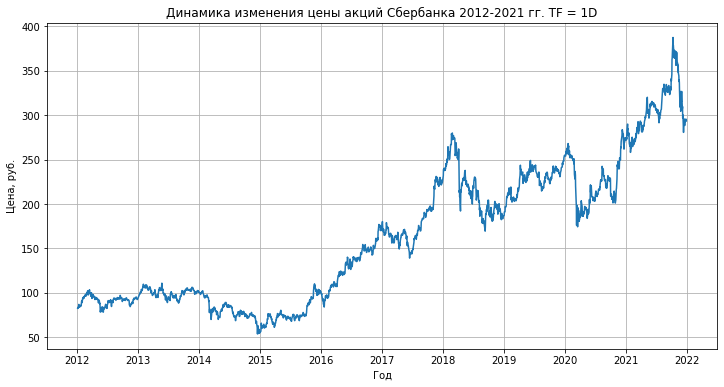

In [53]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('День')
plt.ylabel('Цена, руб.')
#plt.plot(Sber_data['<CLOSE>'])
plt.plot(Sber_data['Close'])
plt.title('Динамика изменения цены акций Сбербанка 2012-2021 гг. TF = 1D')
plt.show()

Рассмотрим нормальное раcпределение цены нашего ДФ

In [ ]:
#Distribution of the dataset
#Sber_data.plot(kind='kde')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: ignored

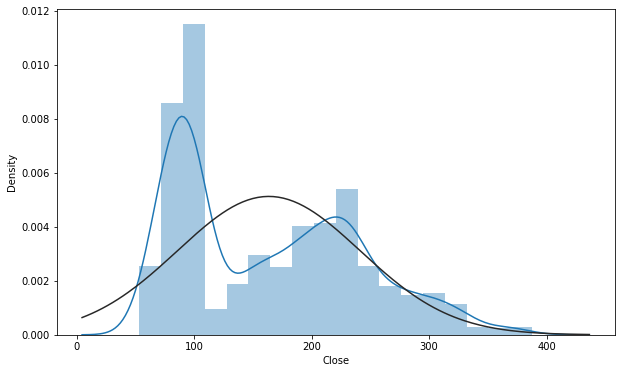

<Figure size 720x432 with 0 Axes>

In [59]:
sns.distplot(Sber_data['Close'], fit=norm);
fig = plt.figure()
res = stats.probplot(Sber_data['Close'], plot=plt)



Отобразим наглядно корреляцию признаков в ДФ

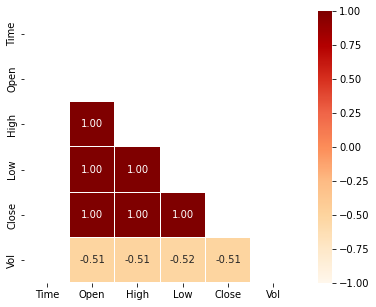

In [ ]:
graph = Sber_data.select_dtypes(exclude="object").corr()
mask = np.triu(np.ones_like(graph, dtype=bool))
cmap = sns.diverging_palette(220, 25, s=80, n=9, as_cmap=True, center="light")
plt.figure(figsize=(8, 5))
sns.heatmap(graph, mask = mask, annot=True, cmap='OrRd', square=True, fmt='.2f',linewidth=.2, center=0, vmin=-1, vmax=1)
plt.show()

Вывод: чёткой корреляции значений движения цены от других значений, не связанных с диапазоном движения цены в течение дня (открытие, максимум, минимум, закрытие), не прослеживается.

*Пояснение: р
аздел "Time" пустой по причине рассмотрения графика с временнЫм промежутком = 1 день.*

Тем не менее построим график целевой переменной Close и поищем выбросы

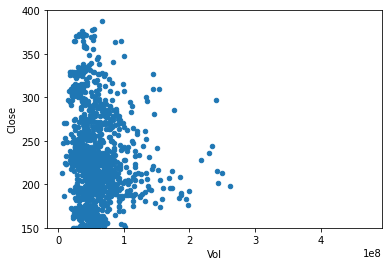

In [ ]:
var = 'Vol'
data = pd.concat([Sber_data['Close'], Sber_data[var]], axis=1)
data.plot.scatter(x=var, y='Close', ylim=(150,400));

На графике мы не наблюдаем какой-либо зависимости движения цены от объёма.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


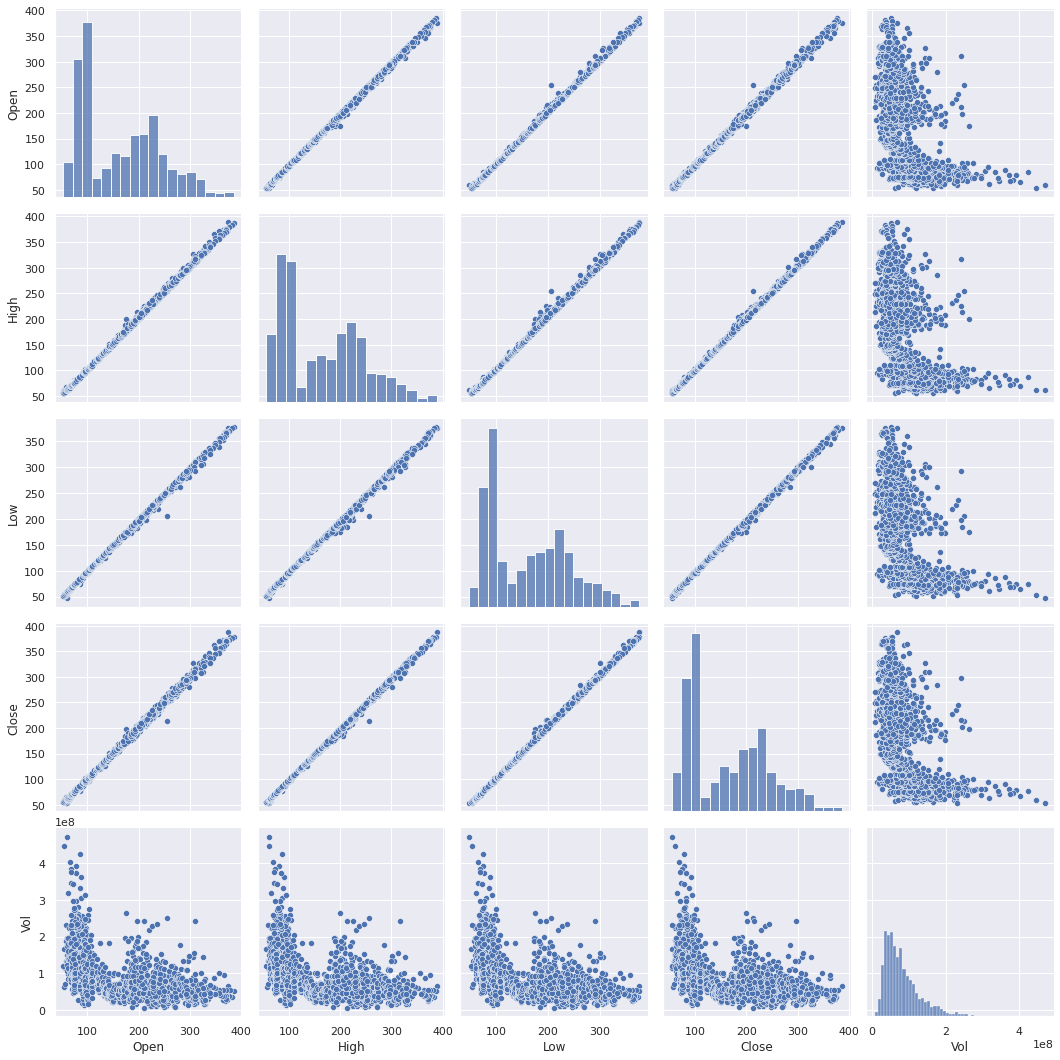

In [ ]:
sns.set()
cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Vol']
sns.pairplot(Sber_data[cols], size = 3)
plt.show();

Как и ожидалось, чёткой корреляции между любым уровнем цены (открытия / максимума / минимума/ хакрытия) и объёмом не прослеживается. Уровни цен коррелируют между собой, что логично.

# Раздел 3 - Прогнозирование движения цены


Описание данных

В файле Sber_data.csv cодержится информация об изменении рыночной стоимости акций компании Сбербанк на фондовом рынке за 60-минутные интервалы с 01 января 2020 г. по 31.12.2021, а так же информация об объёмах торгов в указанном диапазоне времени.

Описание столбцов:

Ticker - тикер компании на фондовом рынке.
Per	- временной промежуток изменения цены.
Date	- дата.
Time	- время начала рассматриваемого диапазона движения цены.
Open	- цена открытия в рассматриваемом временном интервале (Time)
High	- Максимальный уровень цены в рассматриваемом временном интервале (Time). 
Low	- Минимальный уровень цены в рассматриваемом временном интервале (Time).
Close	- цена закрытия в рассматриваемом временном интервале (Time).
Vol - объём торгов в рассматриваемом временном интервале (Time).


Импорт данных в новый ДФ

In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('Sber_12_21_D1.csv', sep = ';')    # Далее переименовать df в Sber_data_vr
Sber_data_vr = pd.read_csv('Sber_12_21_D1.csv', sep = ';', index_col='<DATE>', parse_dates=['<DATE>'], date_parser=dateparse).fillna(0)    # Далее переименовать df в Sber_data_vr
df = df.rename(columns = {'<TICKER>' : 'Ticker', '<PER>':'Per', '<DATE>':'Date', '<TIME>':'Time', '<OPEN>':'Open',
                            '<HIGH>':'High', '<LOW>':'Low', '<CLOSE>':'Close', '<VOL>':'Vol'})
Sber_data_vr = Sber_data_vr.rename(columns = {'<TICKER>' : 'Ticker', '<PER>':'Per', '<DATE>':'Date', '<TIME>':'Time', '<OPEN>':'Open',
                            '<HIGH>':'High', '<LOW>':'Low', '<CLOSE>':'Close', '<VOL>':'Vol'})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [5]:
#df.tail(34)    # Далее переименовать df в 
Sber_data_vr

,Ticker,Per,Time,Open,High,Low,Close,Vol
<DATE>,,,,,,,,
2012-01-03,SBER,D,0,80.12,82.50,80.12,82.41,78834880
2012-01-04,SBER,D,0,82.44,84.48,81.91,83.52,136539450
2012-01-05,SBER,D,0,83.50,84.44,82.05,82.55,110168460
2012-01-06,SBER,D,0,82.51,84.38,81.67,83.20,126005770
2012-01-09,SBER,D,0,82.59,84.22,82.42,83.88,89202980
...,...,...,...,...,...,...,...,...
2021-12-24,SBER,D,0,293.00,294.18,289.00,293.89,37669750
2021-12-27,SBER,D,0,294.79,296.00,293.37,295.68,35728530
2021-12-28,SBER,D,0,295.84,297.55,294.18,295.00,37853360


Визуализация данных

In [6]:
import torch
from torch import nn
from torch.utils.data import (
    TensorDataset, DataLoader, Dataset
)
device = f"cuda:{device_num - 1}" if torch.cuda.is_available() else "cpu"  

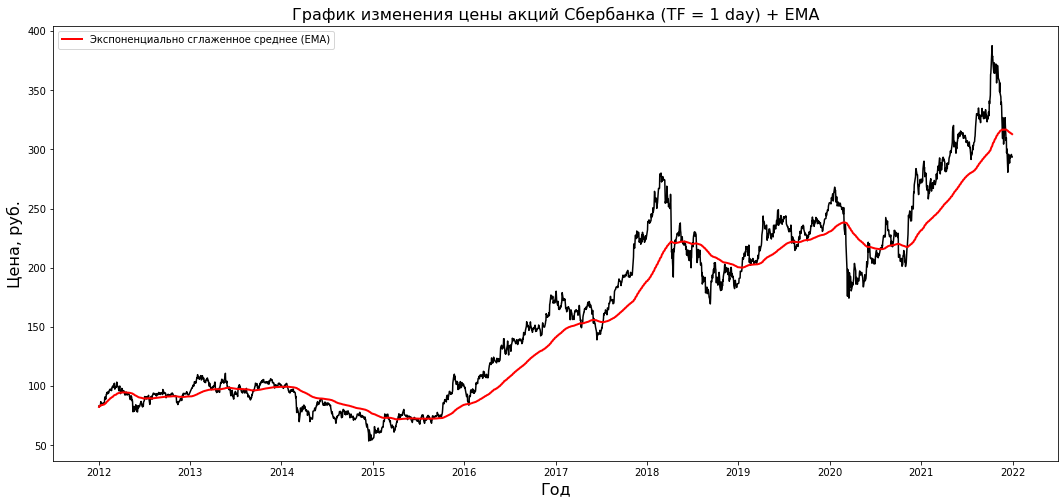

In [7]:
fontsize = 16
plt.figure(figsize = (18, 8))
plt.title("График изменения цены акций Сбербанка (TF = 1 day) + EMA", fontsize=fontsize)
plt.plot(Sber_data_vr.index, Sber_data_vr.Close, color='black')
plt.plot(
    Sber_data_vr.index, 
    Sber_data_vr.Close.ewm(alpha=0.01).mean(), 
    color='red', 
    linewidth=2,
    label='Экспоненциально сглаженное среднее (EMA)'
)
plt.xlabel("Год", fontsize=fontsize)
plt.ylabel("Цена, руб.", fontsize=fontsize)
plt.legend().get_frame().set_facecolor('white')
plt.show()

Зависимость объёмов торгов от времени

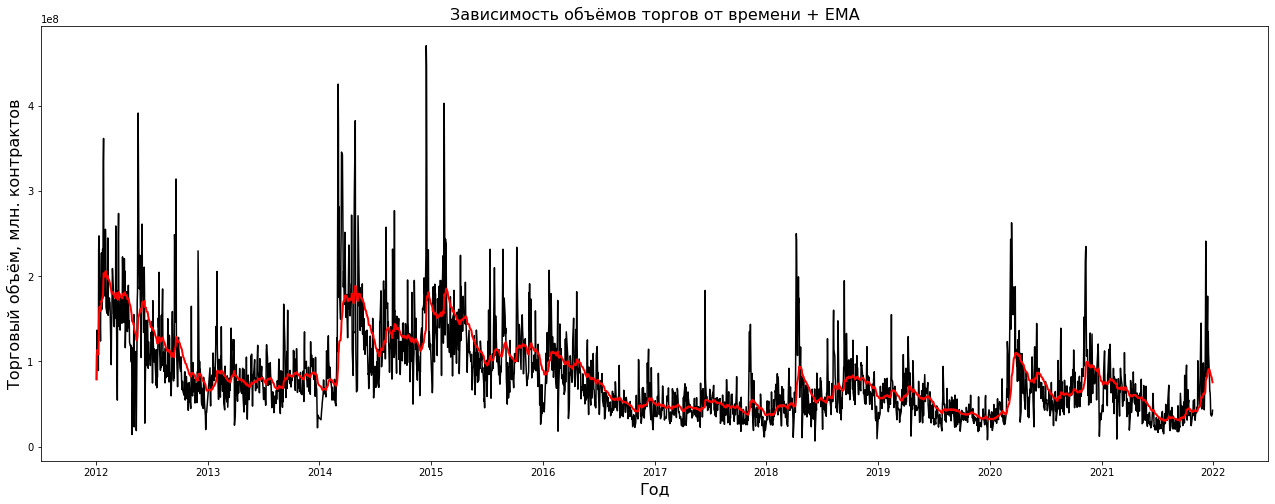

In [8]:
fontsize = 16
plt.figure(figsize = (22, 8))
plt.title("Зависимость объёмов торгов от времени + EMA", fontsize= fontsize)
plt.plot(Sber_data_vr.index, Sber_data_vr.Vol, color='black')
plt.plot(
    Sber_data_vr.index, 
    Sber_data_vr.Vol.ewm(alpha=0.05).mean(), 
    color='red', 
    linewidth=2,
    label='Экспоненциально сглаженное среднее (EMA)'
)
plt.xlabel("Год", fontsize=fontsize)
plt.ylabel("Торговый объём, млн. контрактов", fontsize=fontsize)
plt.show()

Зависимость цены закрытия от цены открытия

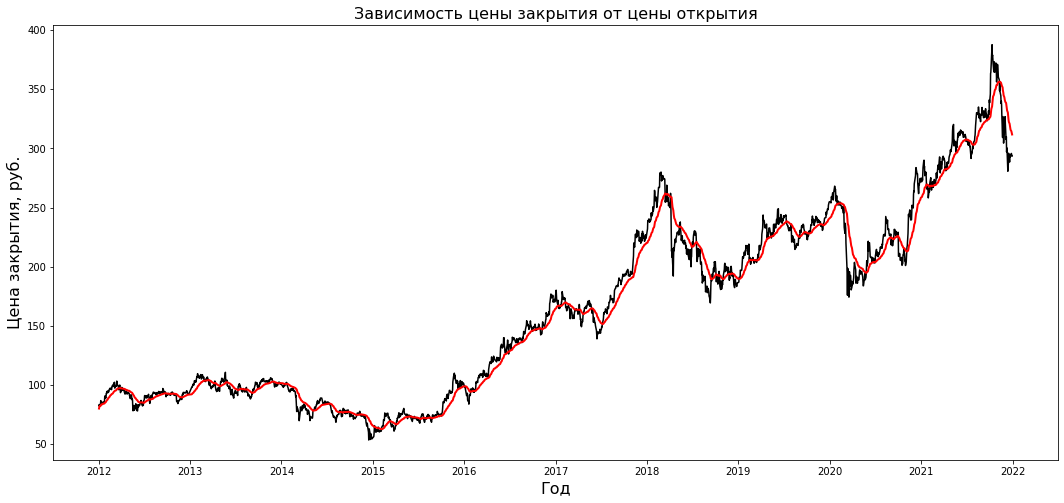

In [62]:
fontsize = 16
plt.figure(figsize = (18, 8))
plt.title("Зависимость цены закрытия от цены открытия", fontsize= fontsize)
plt.plot(Sber_data_vr.index, Sber_data_vr.Close, color='black')
plt.plot(
    Sber_data_vr.index, 
    Sber_data_vr.Open.ewm(alpha=0.05).mean(), 
    color='red', 
    linewidth=2,
    label='Экспоненциально сглаженное среднее (EMA)'
)
plt.xlabel("Год", fontsize=fontsize)
plt.ylabel("Цена закрытия, руб.", fontsize=fontsize)
plt.show()

------------------

Проведём STL-разложение данного ряда (разложение по сезонам и трендам)


In [10]:
def plot_stl_decomp(stl_decomp, suptitle):
    fig, axes = plt.subplots(3, 1, figsize = (16, 12), sharex=True)

    title_fontsize = 20
    axes[0].plot(stl_decomp.trend)
    axes[0].set_title('Тренд', fontsize=title_fontsize, fontweight='bold')

    axes[1].plot(stl_decomp.seasonal)
    axes[1].set_title('Сезонность', fontsize=title_fontsize, fontweight='bold')

    axes[2].plot(stl_decomp.resid)
    axes[2].set_title('Шум', fontsize=title_fontsize, fontweight='bold')

    fig.suptitle(
        suptitle,
        fontsize=30, 
        fontweight='bold',
    )
    plt.show()

Сначала посмотрим на подневную сезонность

_________________________________________

In [24]:

TARGETS = ["Close", "Open"]

train_data = df[:-1 * 247]
test_data = df[-1 * 247:]


In [25]:
test_data

,Close,Open
2273,276.90,282.55
2274,279.79,275.73
2275,278.19,280.98
2276,279.80,278.63
2277,274.40,280.78
...,...,...
2515,293.89,293.00
2516,295.68,294.79
2517,295.00,295.84
2518,293.51,295.05


# Прогнозирование финансового рынка с использованием библиотеки ARIMA 

###           *(AutoRegressive Integrated Moving Average)*

Начинаем с регистрации ряда, чтобы уменьшить величину значений и уменьшить тенденцию к росту в ряду. Затем, получив журнал ряда, мы находим скользящее среднее значение ряда (MA). Скользящее среднее значение рассчитывается путем учета входных данных за последние 12 месяцев и определения среднего значения цены в каждой последующей точке серии.

In [ ]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
lt.style.use('fivethirtyeight')

No handles with labels found to put in legend.


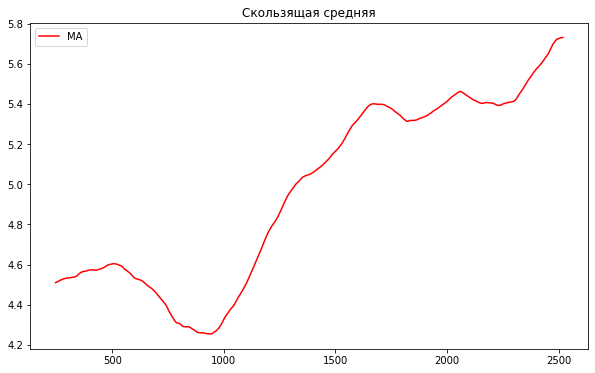

In [76]:
from statsmodels.tsa.arima_model import ARIMA 

from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df['Close'])
moving_avg = df_log.rolling(247).mean()
std_dev = df_log.rolling(247).std()
plt.legend(loc='best')
plt.title('Скользящая средняя')
#plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "MA")
plt.legend()
plt.show()

Создадим модель ARIMA и обучим её цене закрытия акции на основе данных ряда. Сначала разделим данные на обучающий и тестовый наборы и визуализируем их.

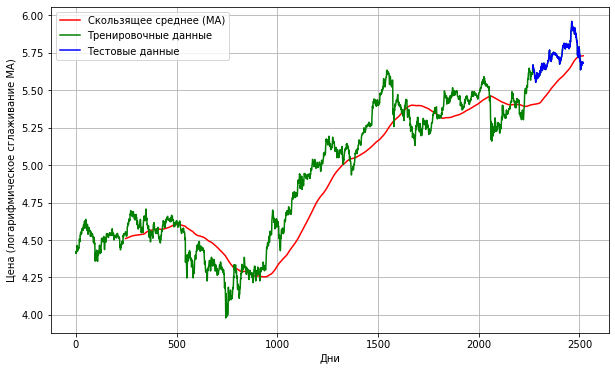

In [72]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))

moving_avg = df_log.rolling(247).mean()
df_log = np.log(df['Close'])
moving_avg = df_log.rolling(247).mean()
plt.plot(moving_avg, color="red", label = "Скользящее среднее (MA)")

plt.grid(True)
plt.xlabel('Дни')
plt.ylabel('Значение логарифмического сглаживания MA)')
plt.plot(df_log, 'green', label='Тренировочные данные')
plt.plot(test_data, 'blue', label='Тестовые данные')
plt.legend()

Выборь параметров p,q,d для модели ARIMA

In [45]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 12.5 MB/s 
     |████████████████████████████████| 9.8 MB 39.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/pmdarima-1.8.4.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):
/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/statsmodels-0.13.1.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11336.104, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11336.724, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11337.183, Time=3.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11336.510, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11335.646, Time=1.63 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-11350.578, Time=1.64 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11349.530, Time=1.49 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-11349.569, Time=1.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-11346.944, Time=1.83 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-11350.846, Time=1.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-11337.709, Time=0.74 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-11349.708, Time=1.02 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=-11349.734, Time=1.29 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-11336.224, Time=0.29 sec
 ARIM

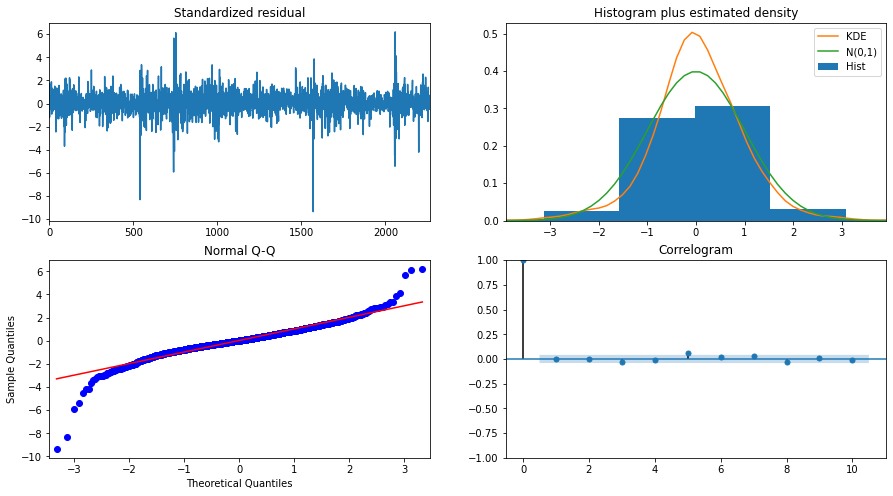

In [46]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

Интерпретация диагностики

Вверху слева: Остаточные ошибки, по-видимому, колеблются вокруг среднего значения, равного нулю, и имеют более или менее равномерную дисперсию.

Вверху справа: График плотности предполагает нормальное распределение со средним нулем.

Внизу слева: Все точки должны идеально совпадать с красной линией. Любые существенные отклонения будут означать, что распределение искажено.

Внизу справа: Коррелограмма, она же график ACF, показывает, что остаточные ошибки не являются автокоррелированными. Любая автокорреляция будет означать, что в остаточных ошибках есть некоторая закономерность, которая не объясняется в модели. Поэтому нужно будет поискать больше X (предикторов) для модели.

В целом можно считать диагностику выполненной. 

Можно пробовать прогнозировать цены акций.


Таким образом, модель Auto ARIMA предоставила значения p, d и q как 0, 1 и 2 соответственно.

In [47]:
# Моделирование
# Построение модели
model = ARIMA(train_data, order=(0,1,2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:339: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring()
/usr/local/lib/python3.7/dist-packages/scipy/optimize/lbfgsb.py:360: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  task_str = task.tostring().strip(b'\x00').strip()


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2264
Model:                 ARIMA(0, 1, 2)   Log Likelihood                5679.309
Method:                       css-mle   S.D. of innovations              0.020
Date:                Thu, 27 Jan 2022   AIC                         -11350.617
Time:                        20:02:10   BIC                         -11327.717
Sample:                             1   HQIC                        -11342.261
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0005      0.000      1.332      0.183      -0.000       0.001
ma.L1.D.Close     0.0331      0.021      1.577      0.115      -0.008       0.074
ma.L2.D.Close    -0.0844      0.021     

Начнем прогнозировать цены акций на тестовом наборе данных с сохранением 95%-ного уровня достоверности.

In [48]:
# Прогнозирование
fc, se, conf = fitted.forecast(252, alpha=0.05)  # 95% вероятность

Построим график результатов:

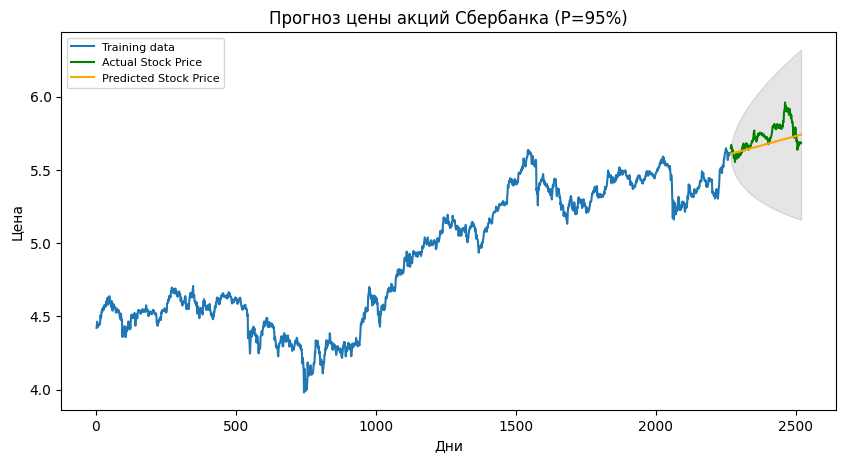

In [74]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='Training data')
plt.plot(test_data, color = 'green', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Прогноз цены акций Сбербанка (P=95%)')
plt.xlabel('Дни')
plt.ylabel('Цена')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Показатели точности для оценки результатов прогноза:

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))


MSE: 0.007573957257359292
MAE: 0.06856848661003746
RMSE: 0.0870284853215273
MAPE: 0.011842859449647749
